In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Admission_Predict.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.shape

(400, 9)

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<Axes: >

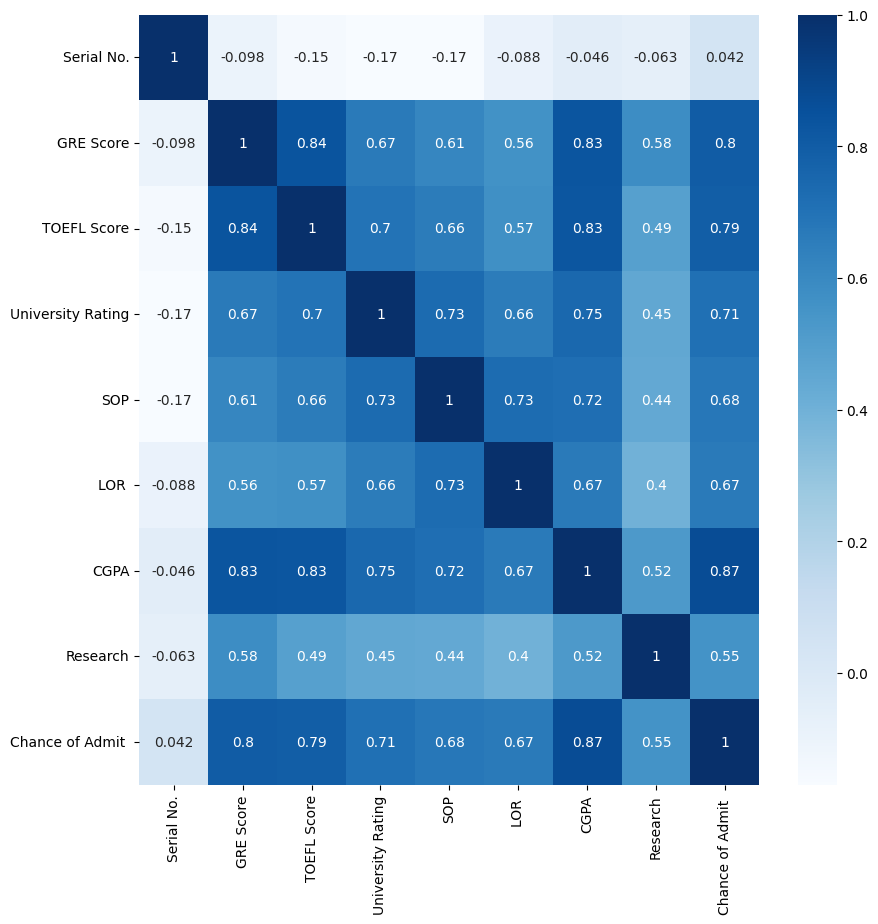

In [ ]:
  plt.figure(figsize= (10,10))
  sns.heatmap(df.corr(),annot=True,cmap='Blues')

Text(0, 0.5, 'GRE Score')

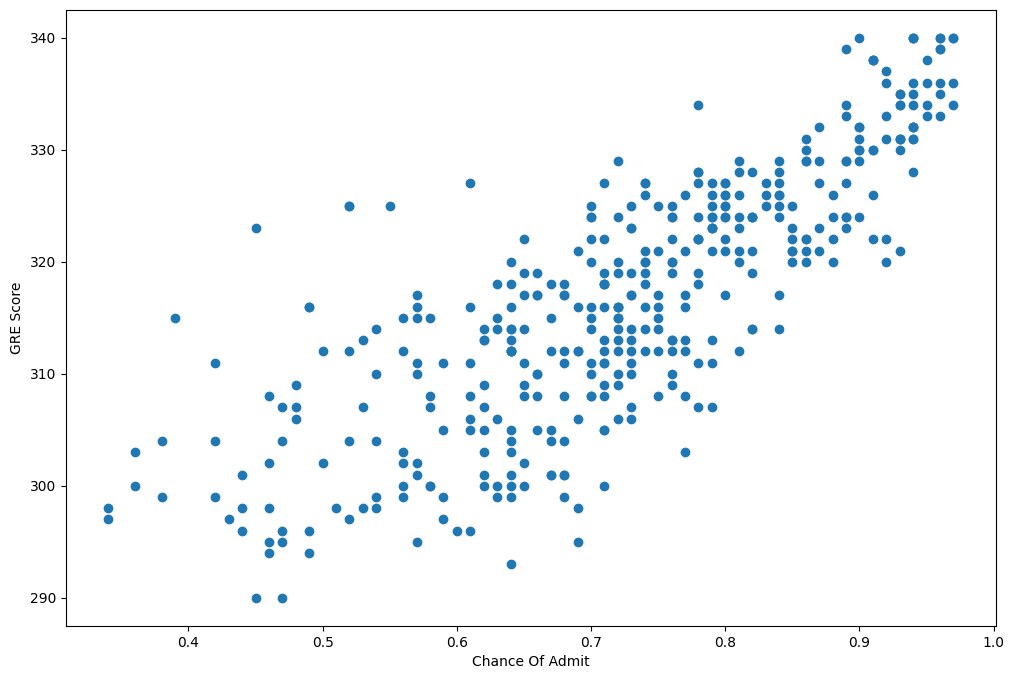

In [ ]:
plt.subplots(figsize=(12,8))
plt.scatter(df["Chance of Admit "],df["GRE Score"] )
plt.xlabel("Chance Of Admit")
plt.ylabel("GRE Score")

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

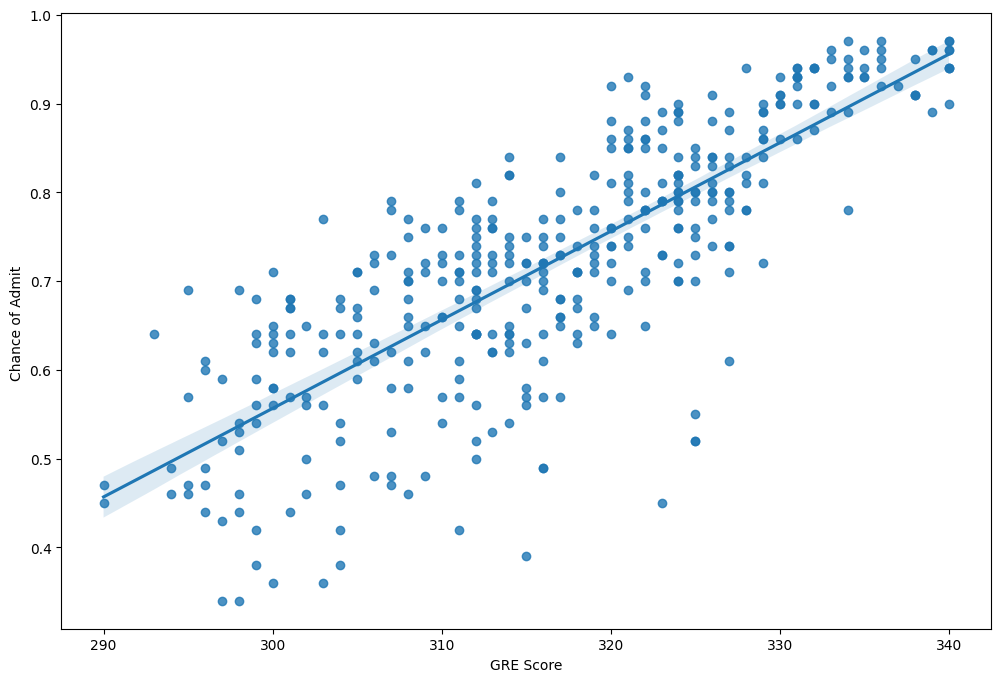

In [ ]:
plt.subplots(figsize=(12,8))
sns.regplot(x="GRE Score" , y="Chance of Admit " , data=df)

In [ ]:
df.columns=df.columns.str.replace(' ',"")

In [ ]:
df.columns

Index(['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceofAdmit'],
      dtype='object')

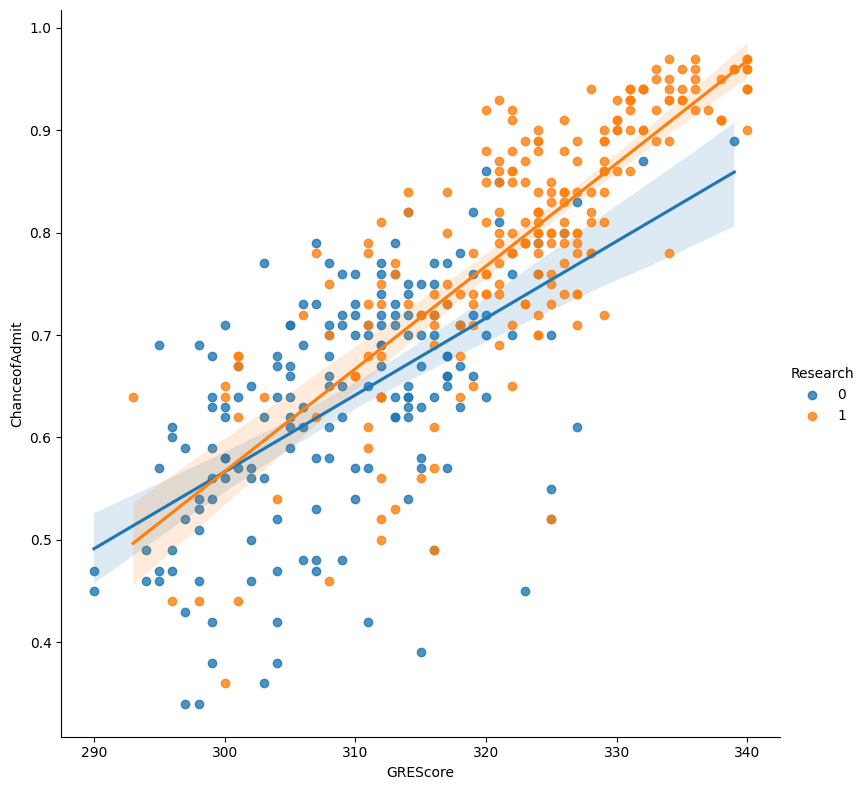

In [ ]:
sns.lmplot(x="GREScore",y="ChanceofAdmit",data=df,hue="Research",height=8)

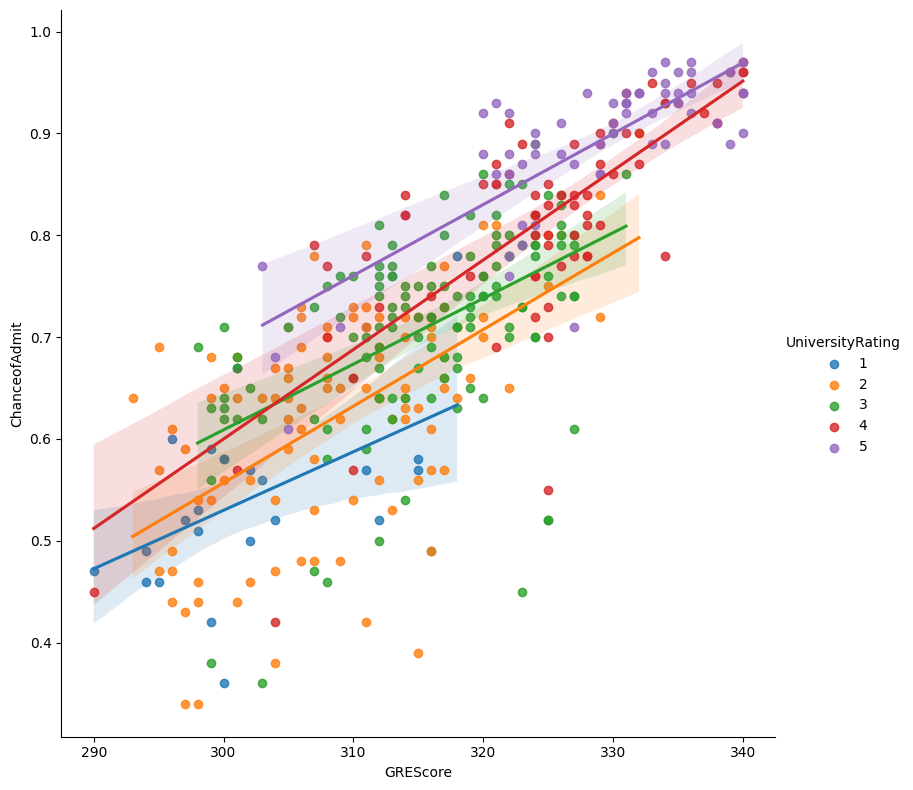

In [ ]:
sns.lmplot(x="GREScore",y="ChanceofAdmit",data=df,hue="UniversityRating",height=8)

In [ ]:
admit_high_chance=df[df["ChanceofAdmit"]>=0.8]
admit_high_chance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo.         128 non-null    int64  
 1   GREScore          128 non-null    int64  
 2   TOEFLScore        128 non-null    int64  
 3   UniversityRating  128 non-null    int64  
 4   SOP               128 non-null    float64
 5   LOR               128 non-null    float64
 6   CGPA              128 non-null    float64
 7   Research          128 non-null    int64  
 8   ChanceofAdmit     128 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 10.0 KB


In [ ]:
admit_high_chance.corr()

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
SerialNo.,1.000000,-0.140435,-0.223184,-0.211793,-0.088391,-0.141164,-0.220561,-0.031246,-0.227214
GREScore,-0.140435,1.000000,0.722463,0.358013,0.320138,0.246629,0.754434,0.167532,0.716187
TOEFLScore,-0.223184,0.722463,1.000000,0.274811,0.337175,0.302047,0.648308,0.083921,0.673774
UniversityRating,-0.211793,0.358013,0.274811,1.000000,0.584860,0.531448,0.479284,0.190083,0.584556
SOP,-0.088391,0.320138,0.337175,0.584860,1.000000,0.601405,0.519791,0.148911,0.565463
LOR,-0.141164,0.246629,0.302047,0.531448,0.601405,1.000000,0.441634,0.050772,0.488480
CGPA,-0.220561,0.754434,0.648308,0.479284,0.519791,0.441634,1.000000,0.158186,0.871533
Research,-0.031246,0.167532,0.083921,0.190083,0.148911,0.050772,0.158186,1.000000,0.226028
ChanceofAdmit,-0.227214,0.716187,0.673774,0.584556,0.565463,0.488480,0.871533,0.226028,1.000000


<ipython-input-17-5c352d1cc6fa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(admit_high_chance["GREScore"])


<Axes: xlabel='GREScore', ylabel='Density'>

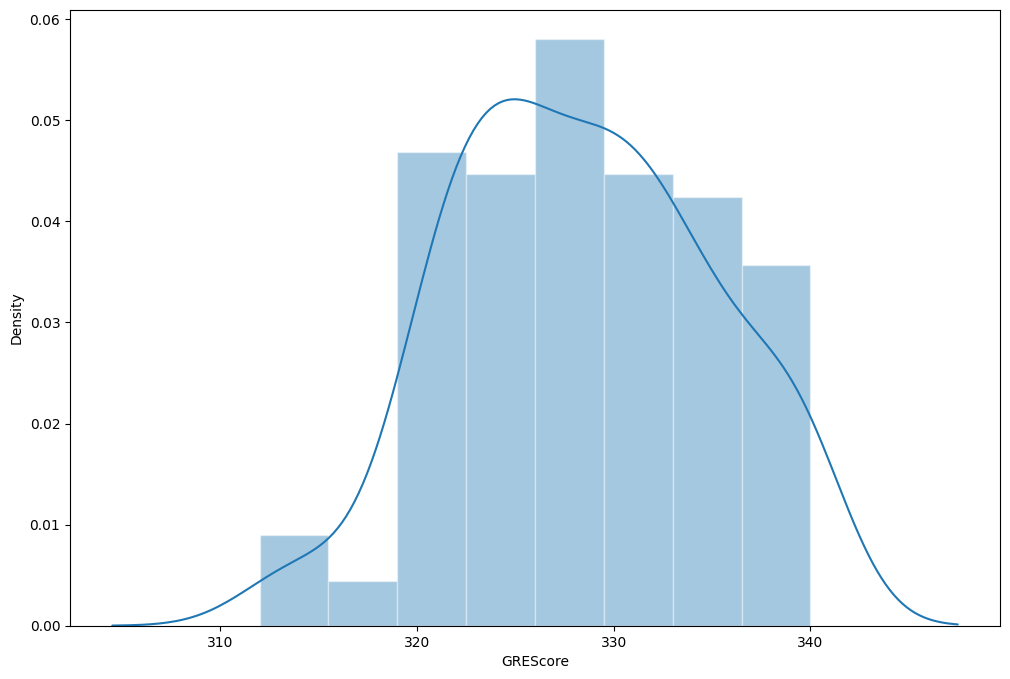

In [ ]:
plt.subplots(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.distplot(admit_high_chance["GREScore"])

<ipython-input-18-8a9b4cac6192>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(admit_high_chance["ChanceofAdmit"])


<Axes: xlabel='ChanceofAdmit', ylabel='Density'>

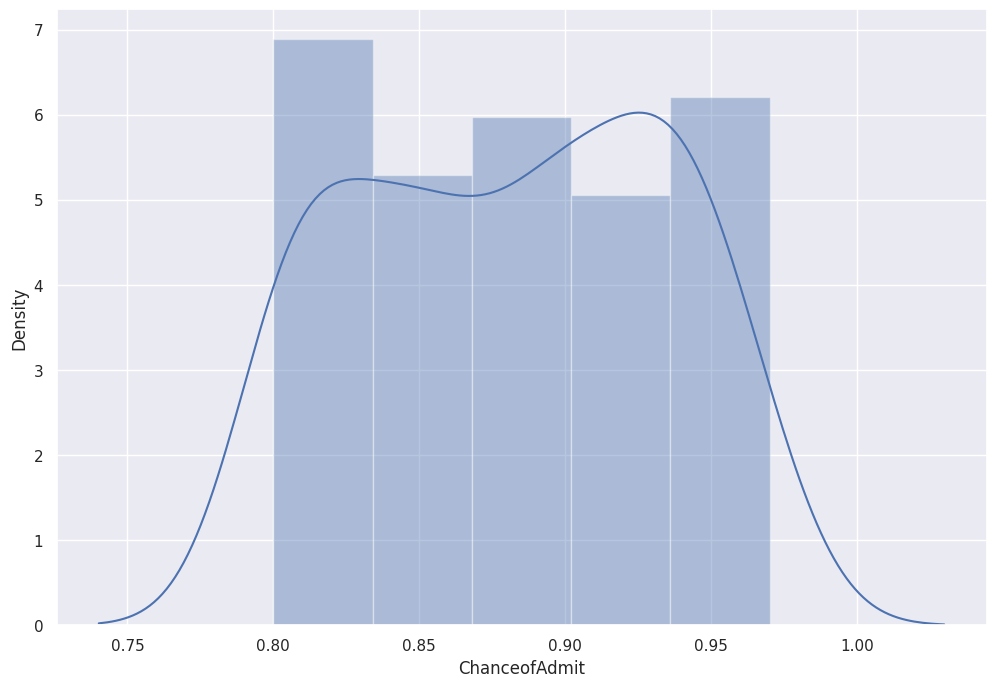

In [ ]:
plt.subplots(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.distplot(admit_high_chance["ChanceofAdmit"])

In [ ]:
x=df["GREScore"].values
x=x/340
y=df["ChanceofAdmit"].values

In [ ]:
df['ChanceofAdmit'] =[1 if each >0.75 else 0for each in df['ChanceofAdmit']]

In [ ]:
x=df[['GREScore','SOP','TOEFLScore','LOR','CGPA','Research','UniversityRating']]
y=df['ChanceofAdmit']

In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [ ]:
print(f"Size of Splitted data")
print(f"x_train  {x_train.shape}")
print(f"x_test  {x_test.shape}")
print(f"y_train  {y_train.shape}")
print(f"y_test  {y_test.shape}")


Size of Splitted data
x_train  (300, 7)
x_test  (100, 7)
y_train  (300,)
y_test  (100,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor(random_state=1)

In [ ]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
y_pred_dt = model_dt.predict(x_test)
result=pd.DataFrame({"Actual" : y_test,
                     "Predicted ": y_pred_dt})
result

,Actual,Predicted
398,0,1.0
125,0,0.0
328,1,1.0
339,1,0.0
172,1,1.0
...,...,...
300,0,0.0
277,0,0.0
289,1,0.0
260,1,1.0


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score
from sklearn.metrics import classification_report

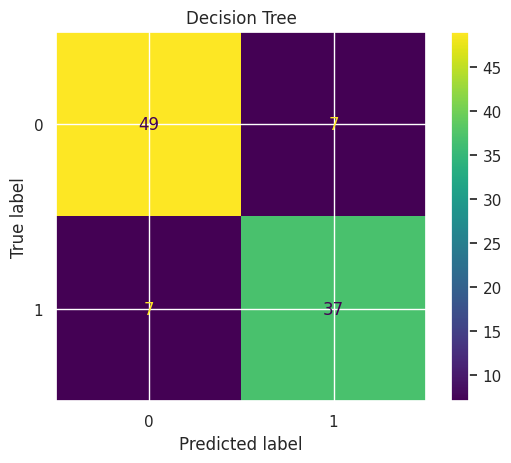

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)
plt.title("Decision Tree")
plt.show()


In [ ]:
print(f"Accuracy is :{accuracy_score(y_test,y_pred_dt)}")

Accuracy is :0.86


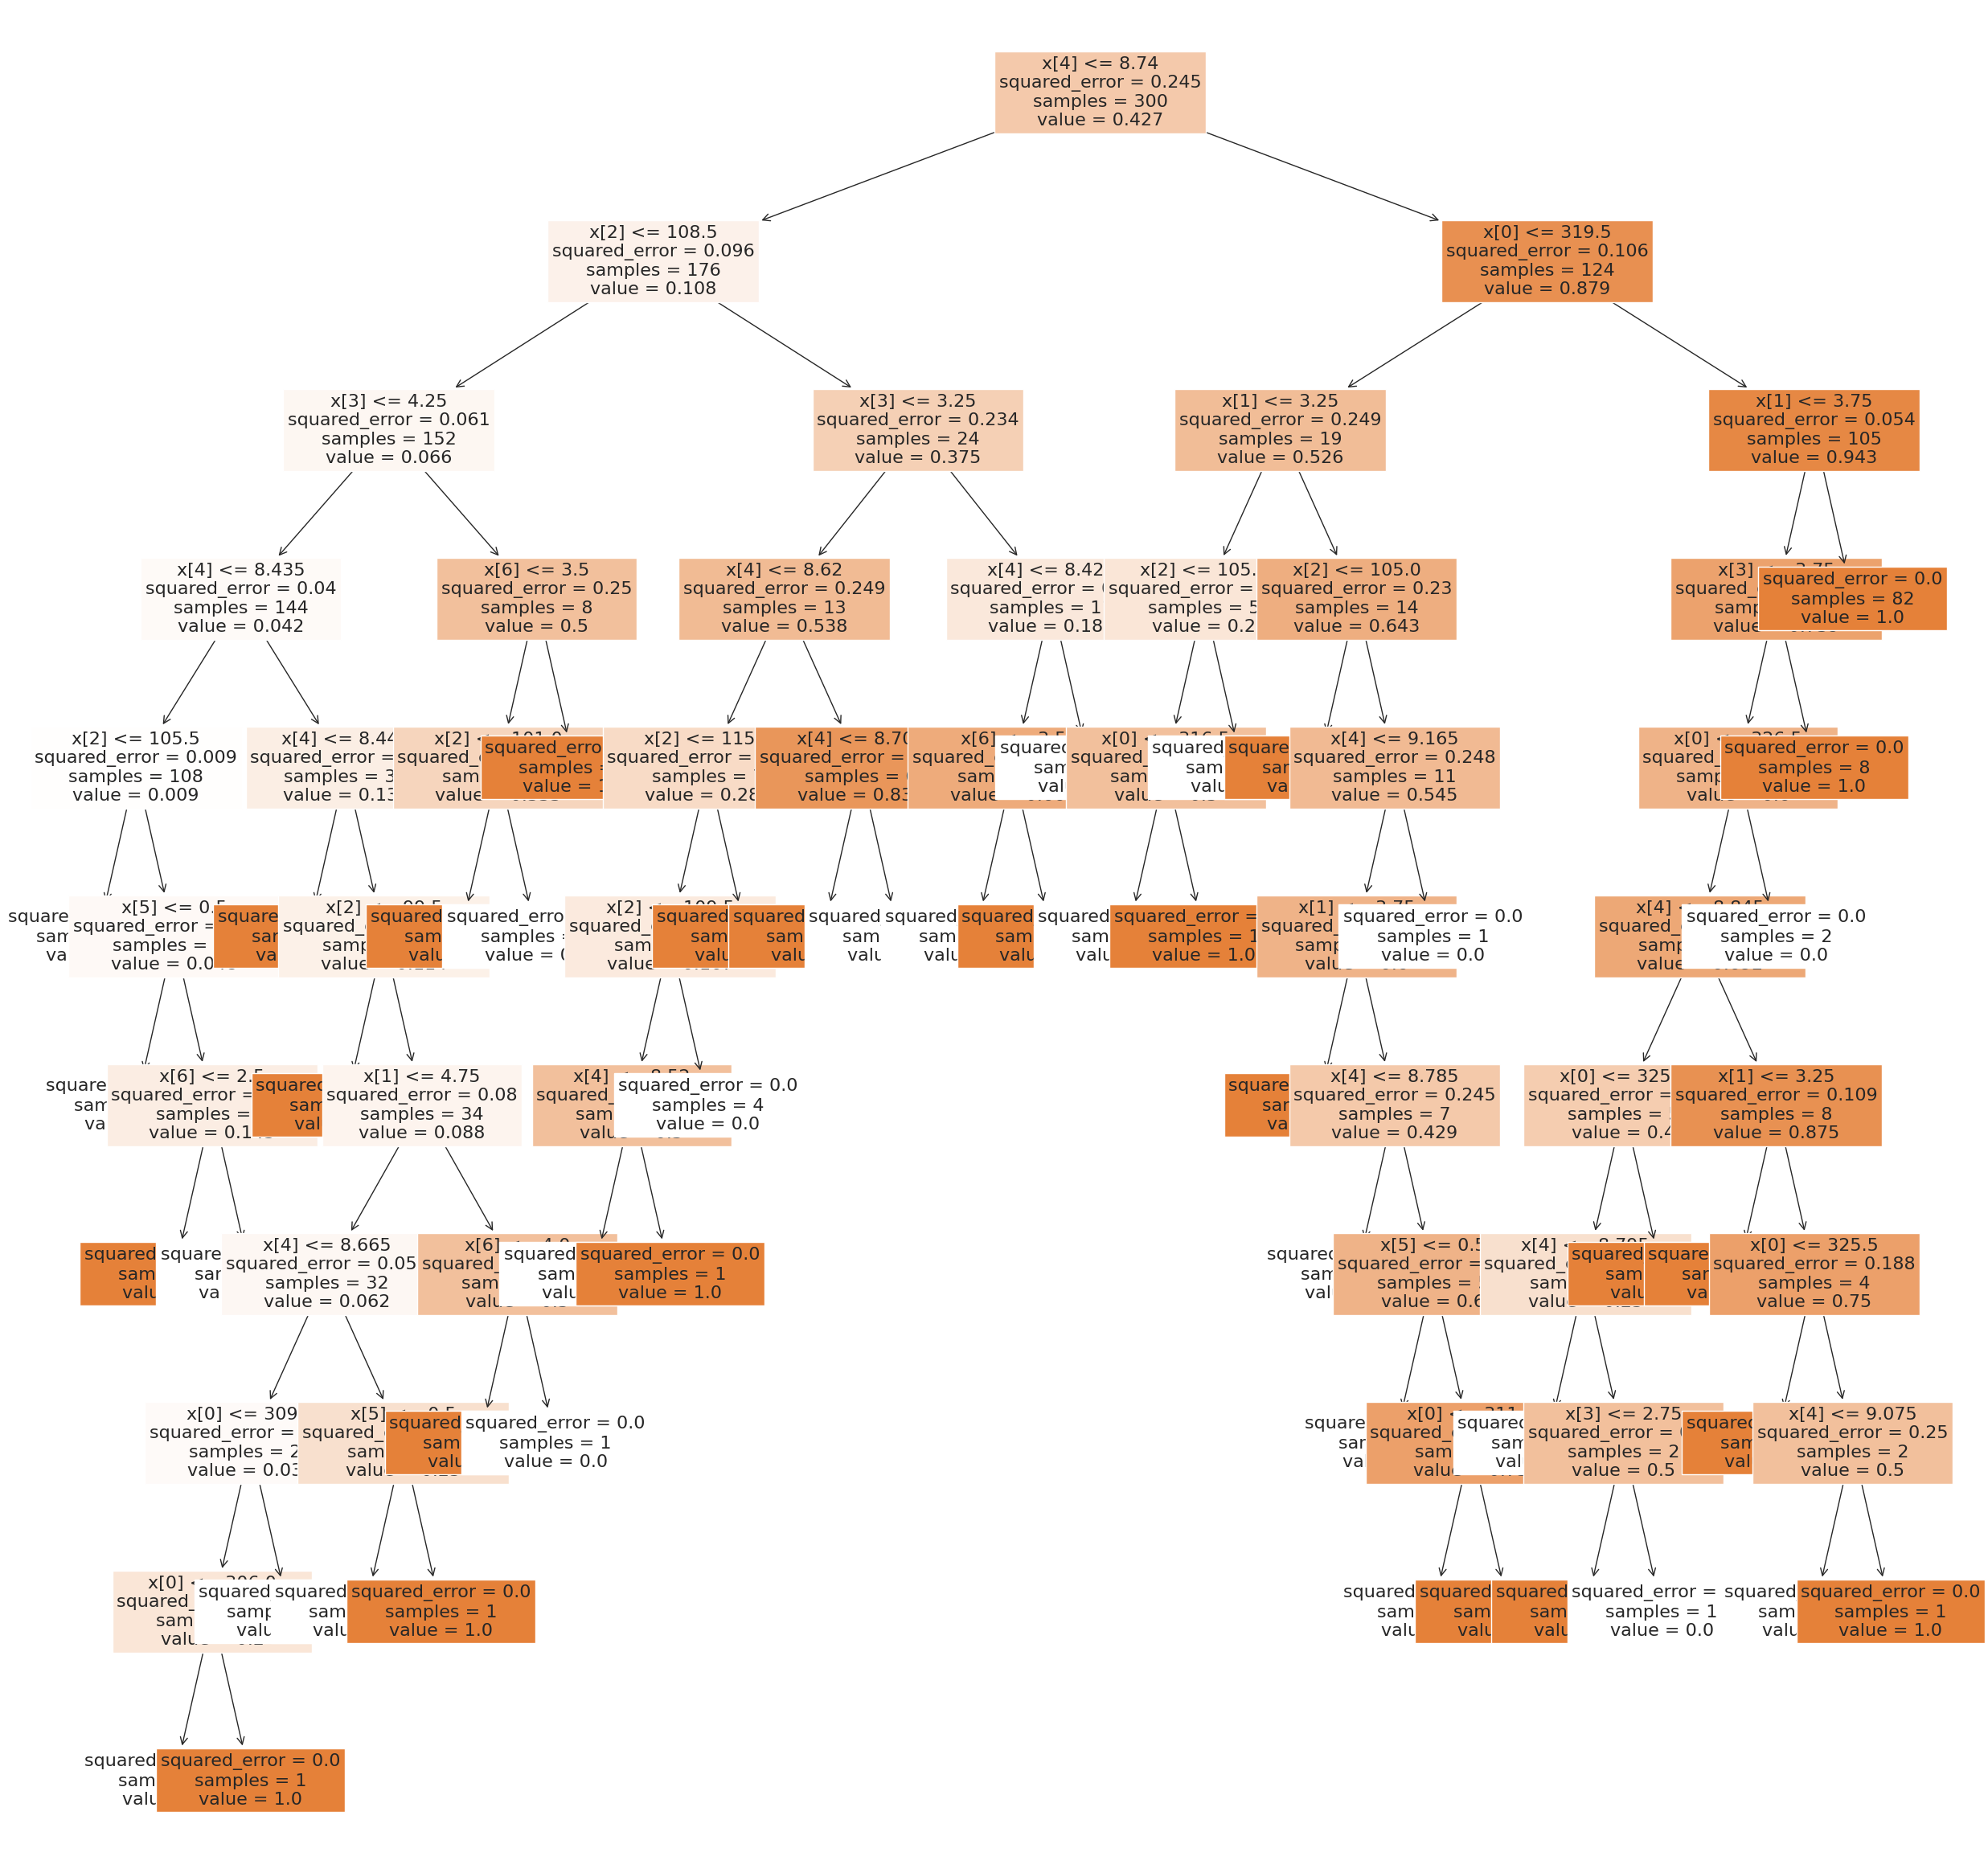

In [ ]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(model_dt,filled=True,fontsize=16)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(random_state=1,solver='lbfgs',max_iter=1000)


In [ ]:
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [ ]:
y_pred_lr=model_lr.predict(x_test)

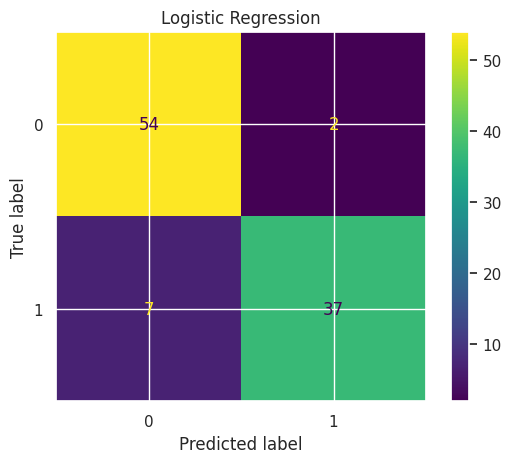

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
plt.title('Logistic Regression')
plt.show()

In [ ]:
print(f"Accuracy :{accuracy_score(y_test,y_pred_lr)}")

Accuracy :0.91


In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        56
           1       0.95      0.84      0.89        44

    accuracy                           0.91       100
   macro avg       0.92      0.90      0.91       100
weighted avg       0.91      0.91      0.91       100

